(c) Lorena Ciutacu

# Fear and loathing in Romanian: A data analysis on the semantics of psych-verbs.

This project was carried out for my Master's thesis proposal in Linguistics at Humboldt-Universität zu Berlin. 
Please refer to the README in the repository for additional information about the theory of psychological verbs and the goals of this experimental study. This notebook represents the data analysis and findings on a verb rating experiment.

## Notebook contents:

### 1. Setup & Data clening
### 2. Descriptive analysis
###    2.1. by verb
###    2.2. by experiencer
###    2.3. by domain
###    2.4. by valence-arousal-duration
### 3. Clustering
### 4. Classification
### 5. Conclusion

# 1. Setup & Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics

In [2]:
# read in the dataset

df = pd.read_csv('ratings.csv')
df

,Domain,Experiencer,Verb,Duration,Arousal,Valence
0,anger,OE,a enerva,2.20,3.86,1.40
1,anger,OE,a supăra,2.20,3.14,1.95
2,anger,OE,a frustra,2.60,3.43,1.35
3,anger,OE,a irita,2.00,2.87,1.55
4,anger,OE,a provoca,2.40,3.29,1.25
5,disgust,OE,a dezgusta,1.80,3.00,1.75
6,disgust,OE,a ofensa,1.20,2.57,3.00
7,disgust,OE,a respinge,3.40,3.71,1.35
8,disgust,OE,a se rușina,1.40,2.86,1.45
9,disgust,OE,a umili,1.60,3.43,1.90


In [3]:
# find the number of rows and columns in the dataset

df.shape

(54, 6)

In [4]:
# show the names of the columns

df.columns

Index(['Domain', 'Experiencer', 'Verb', 'Duration', 'Arousal', 'Valence'], dtype='object')

In [5]:
# find the number of unique emotion categories.

domains = df['Domain'].nunique()
print("There are ", domains, " emotion categories.")

There are  6  emotion categories.


In [6]:
# check the data types and missing values

df.info()
# all features have the right type and there are no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Domain       54 non-null     object 
 1   Experiencer  54 non-null     object 
 2   Verb         54 non-null     object 
 3   Duration     54 non-null     float64
 4   Arousal      54 non-null     float64
 5   Valence      54 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.7+ KB


# Descriptive data analysis & visualisation

In [8]:
# summary statistics

print(df.describe(), "\n\nmedian:\n", df.median(), 
    "\n\nmode:", 
    "\nDuration: ", statistics.mode(df.Duration), 
    "\nArousal: ", statistics.mode(df.Arousal),
    "\nValence: ", statistics.mode(df.Valence))

Duration    Arousal    Valence
count  54.000000  54.000000  54.000000
mean    2.256852   3.377037   2.597222
std     0.742209   0.513874   1.178439
min     1.000000   2.140000   1.250000
25%     1.732500   3.140000   1.550000
50%     2.245000   3.430000   1.975000
75%     2.700000   3.710000   3.800000
max     4.140000   4.570000   4.550000 

median:
 Duration    2.245
Arousal     3.430
Valence     1.975
dtype: float64 

mode: 
Duration:  1.86 
Arousal:  3.29 
Valence:  1.55


The average and median duration of the verbs is 2.2, and most commonly 1.8, so most emotions last only a short time.
The average and 

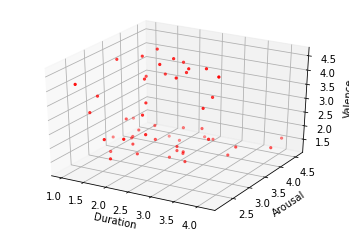

In [9]:
# Create a 3D scatterplot of the Valence, Arousal, Duration values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Duration')
ax.set_ylabel('Arousal')
ax.set_zlabel('Valence')

ax.scatter(df.Duration, df.Arousal, df.Valence, c='r', marker='.')
plt.show()

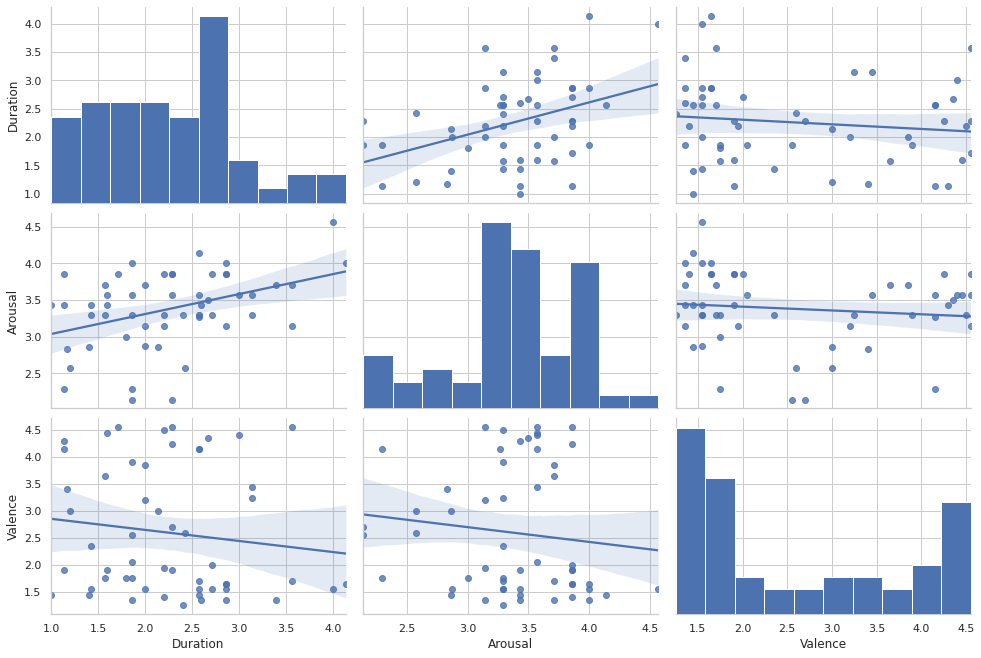

In [47]:
# linear regression

sns.pairplot(df, kind='reg', height=3, aspect=1.5, )

The pair plot above depicts three histograms of Duration, Arousal, and Value, as well as six scatterplots with regression lines of the combinations of the three features.

Histograms:
- Duration has a slightly right-skewed distribution, with most values concentrated at around 2.7.
- Arousal has a bimodal distribution, with peaks at 3.1 and 4.
- Valence has a 

Regression:
- There is a positive correlation between Arousal and Duration, i.e. verbs with high levels of arousal tend to last longer.
- There is a negative correlation between Valence and Duration, i.e. verbs with negative meaning tend to last a short time. 
- There is no correlation between Arousal and Valence.

## Duration

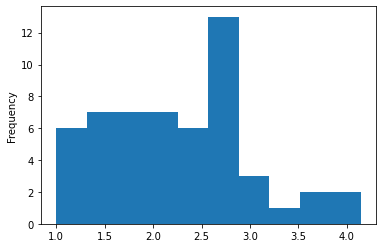

In [11]:
df.Duration.plot.hist()

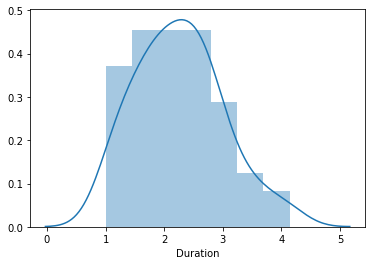

In [12]:
sns.distplot(df.Duration)

## Analysis by experiencer

In [13]:
# Find the mean duration, arousal, and valence by experiences category

groupby_experiencer = df.groupby('Experiencer')
print(groupby_experiencer.describe(), "\nmedian:", groupby_experiencer.median())

Duration                                                         \
               count      mean       std   min     25%    50%     75%   max   
Experiencer                                                                   
OE              32.0  2.209062  0.642110  1.14  1.7775  2.245  2.6275  3.57   
SE              22.0  2.326364  0.879272  1.00  1.6650  2.245  2.8125  4.14   

            Arousal            ...             Valence                      \
              count      mean  ...   75%   max   count      mean       std   
Experiencer                    ...                                           
OE             32.0  3.344063  ...  3.86  4.14    32.0  2.184375  1.028657   
SE             22.0  3.425000  ...  3.71  4.57    22.0  3.197727  1.142520   

                                               
              min     25%   50%     75%   max  
Experiencer                                    
OE           1.25  1.5250  1.75  2.5625  4.55  
SE           1.45  1.8625  3.55  

In [14]:
statistics.mode(df.Arousal)

3.29

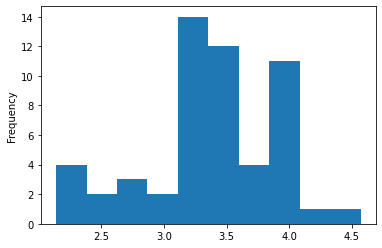

In [15]:
df.Arousal.plot.hist()

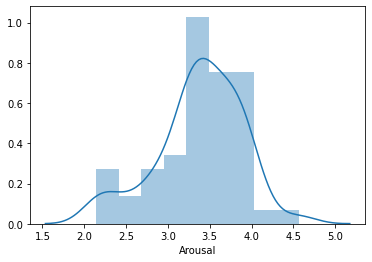

In [16]:
sns.distplot(df.Arousal)

In [17]:
statistics.mode(df.Valence)

1.55

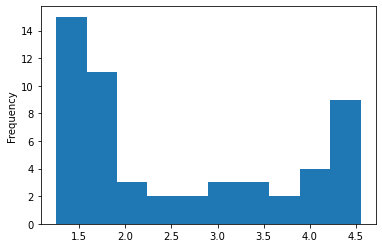

In [18]:
df.Valence.plot.hist()

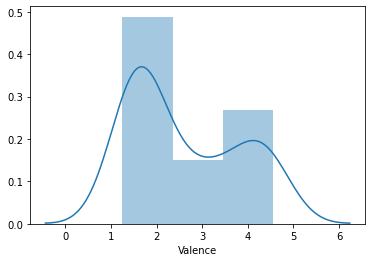

In [19]:
sns.distplot(df.Valence)

#### The most commonly occuring value for Valence is 1.55, for Arousal is 3.29, and Duration has a bimodal distribution.

In [20]:
#variance of values
df.var()

Duration    0.550875
Arousal     0.264067
Valence     1.388719
dtype: float64

In [21]:
#standard deviation
df.std()

Duration    0.742209
Arousal     0.513874
Valence     1.178439
dtype: float64

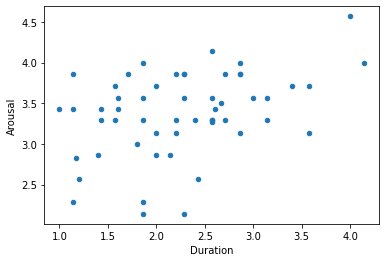

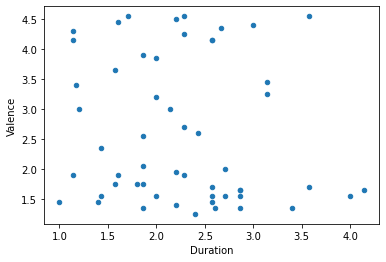

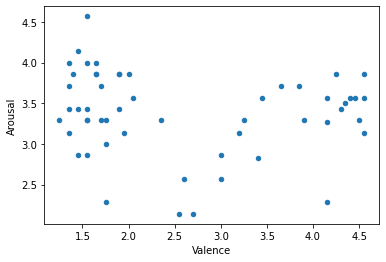

In [22]:
#plot scatterplot
df.plot.scatter(x='Duration', y='Arousal')
df.plot.scatter(x='Duration', y='Valence')
df.plot.scatter(x='Valence', y='Arousal')

## Analysis of verbs

In [23]:
import matplotlib.pyplot as plt

plt.imshow(ratings.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(ratings.columns))]
plt.xticks(tick_marks, ratings.columns, rotation='vertical')
plt.yticks(tick_marks, ratings.columns)

plt.show()

# There is a weak correlation between Duration and Arousal.

NameError: name 'ratings' is not defined

In [24]:
#select the verbs with the longest duration
df[df.Duration >= 4]

,Domain,Experiencer,Verb,Duration,Arousal,Valence
42,happiness,SE,a dori,4.14,4.00,1.65
43,happiness,SE,a iubi,4.00,4.57,1.55


In [25]:
#select the verbs that have an arousal below= 3
df[df.Arousal <= 3]

,Domain,Experiencer,Verb,Duration,Arousal,Valence
3,anger,OE,a irita,2.00,2.87,1.55
5,disgust,OE,a dezgusta,1.80,3.00,1.75
6,disgust,OE,a ofensa,1.20,2.57,3.00
8,disgust,OE,a se rușina,1.40,2.86,1.45
11,fear,OE,a îngrijora,2.43,2.57,2.60
20,happiness,OE,a amuza,1.86,2.29,1.75
23,sadness,OE,a plictisi,1.86,2.14,2.55
27,surprise,OE,a mira,1.17,2.83,3.40
48,sadness,SE,a se plictisi,2.29,2.14,2.70
49,sadness,SE,a se întrista,2.14,2.86,3.00


In [26]:
#select the most positive verbs
df[df.Valence >= 4.5]

,Domain,Experiencer,Verb,Duration,Arousal,Valence
28,surprise,OE,a interesa,3.57,3.14,4.55
29,surprise,OE,a uimi,1.71,3.86,4.55
31,surprise,OE,a impresiona,2.29,3.57,4.55
33,anger,SE,a se supăra,2.20,3.29,4.50


In [27]:
#select the neutral verbs
df[df.Valence == 3]

,Domain,Experiencer,Verb,Duration,Arousal,Valence
6,disgust,OE,a ofensa,1.20,2.57,3.0
49,sadness,SE,a se întrista,2.14,2.86,3.0


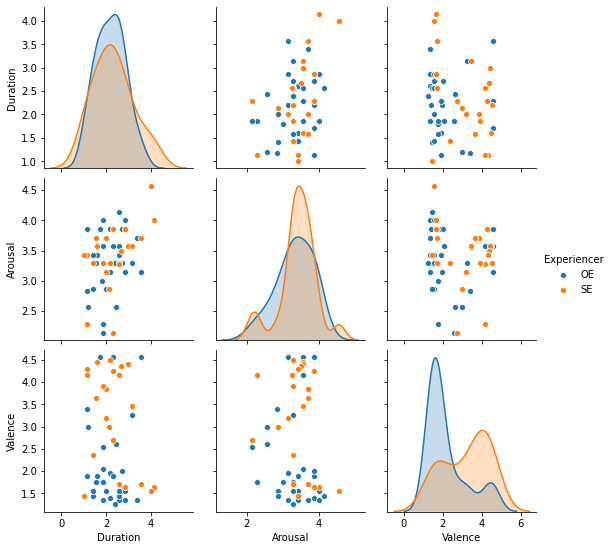

In [28]:
sns.pairplot(df, hue='Experiencer')

OE         AxesSubplot(0.1,0.15;0.363636x0.75)
SE    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

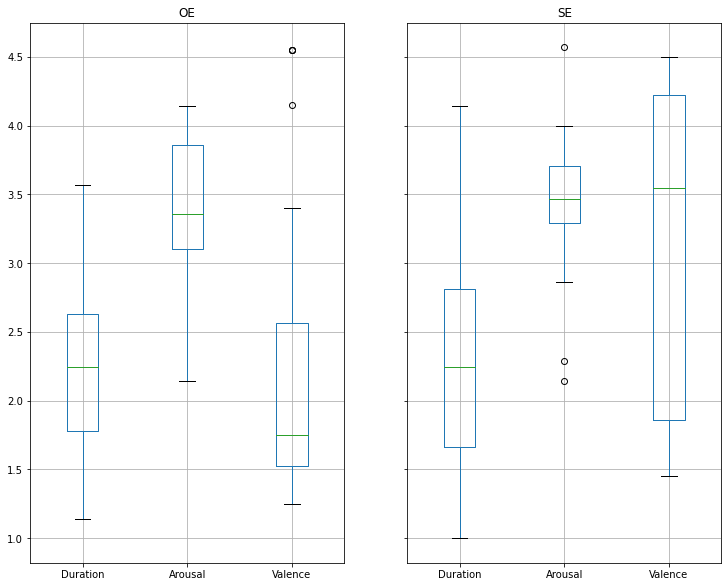

In [29]:
groupby_experiencer.boxplot(return_type='axes', figsize=(12,10))

anger             AxesSubplot(0.1,0.679412;0.363636x0.220588)
disgust      AxesSubplot(0.536364,0.679412;0.363636x0.220588)
fear              AxesSubplot(0.1,0.414706;0.363636x0.220588)
happiness    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
sadness               AxesSubplot(0.1,0.15;0.363636x0.220588)
surprise         AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

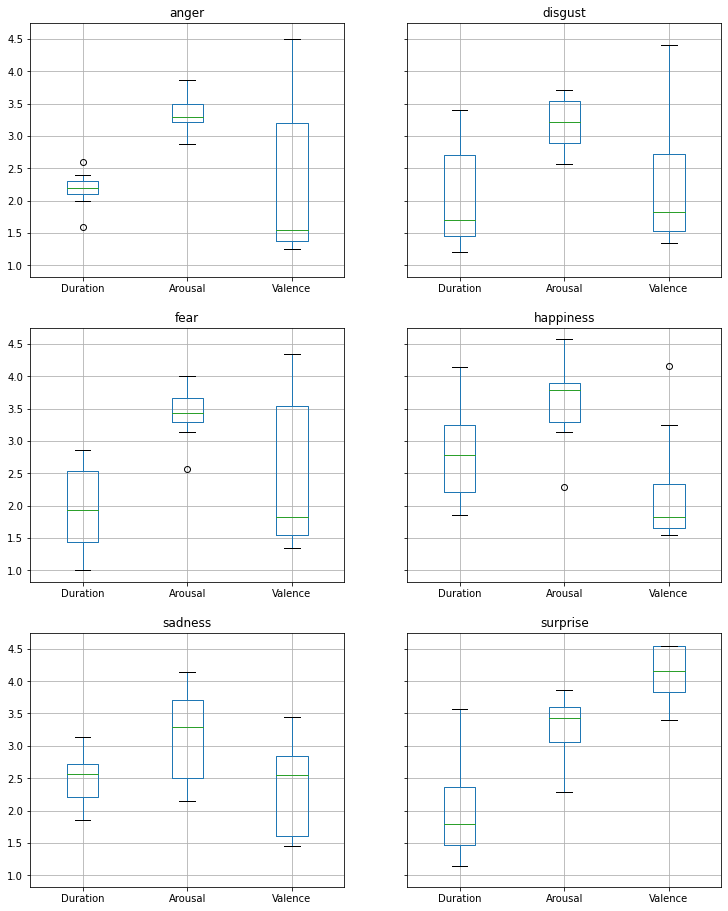

In [30]:
groupby_domain = df.groupby('Domain')
groupby_domain.mean()
groupby_domain.boxplot(return_type='axes', figsize=(12,16))

**Anger**

**Disgust**

**Fear**

**Happiness**

**Sadness**

**Surprise**

In [31]:
#scatter matrices
from pandas.tools import plotting
plotting.scatter_matrix(df[['Duration', 'Arousal', 'Valence']])

ModuleNotFoundError: No module named 'pandas.tools'

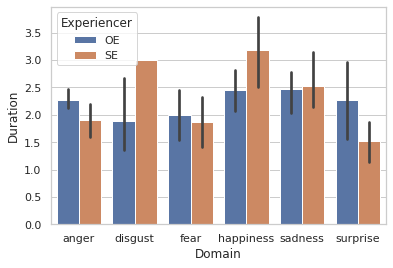

In [32]:
sns.set(style='whitegrid')
sns.barplot(x='Domain', y='Duration', hue='Experiencer', data=df)

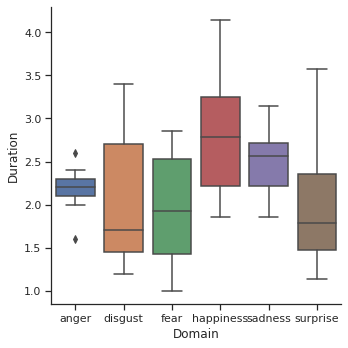

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Domain', 'Duration',  data=df, kind='box')
    g.set_axis_labels('Domain', 'Duration')

## K-Means Clustering

In [34]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,Domain,Experiencer,Verb,Duration,Arousal,Valence
0,anger,OE,a enerva,2.2,3.86,1.40
1,anger,OE,a supăra,2.2,3.14,1.95
2,anger,OE,a frustra,2.6,3.43,1.35
3,anger,OE,a irita,2.0,2.87,1.55
4,anger,OE,a provoca,2.4,3.29,1.25


In [35]:
ratings['Duration'] = ratings['Duration'].astype(float)
ratings['Arousal'] = ratings['Arousal'].astype(float)
ratings['Valence'] = ratings['Valence'].astype(float)

In [36]:
# convert to array

ratings = ratings.to_numpy()

In [37]:
# Split the data into features and targets

X = ratings[:, 3:6] #select the features Duration, Arousal, Valence
Y = ratings[:, 0] #select the target Domain

In [38]:
#encode the target values numerically

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Y = le.fit_transform(Y) 

In [39]:
# Split the dataset into train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

"The most important part of KNN algorithm is the similarity metric which in this case is a distance measure. There are several metrics but we would use Euclidean distance, which is the straight line distance between two points in a Euclidean plane.

In [40]:
def euclidean_distance(training_set, test_instance):
    #number of samples in the training set
    n_samples = training_set.shape[0]

    #create array for distances
    distances = np.empty(n_samples, dtype=np.float64)

    #euclidean distance calculation
    for i in range(n_samples):
        distances[i] = np.sqrt(np.sum(np.square(test_instance - training_set[i])))
    return distances

In [41]:
# Build a class that identifies the nearest neighbors and returns a classification

class NeighborsClassifier():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, Y):
        n_samples = X.shape[0]
        if self.n_neighbors > n_samples:
            raise ValueError("Number of neighbors cannot be larger than the number of samples in the training set")

        if X.shape[0] != Y.shape[0]:
            raise ValueError("Number of samples in X and Y need to be equal")

        self.classes_ = np.unique(Y)
        self.X = X
        self.Y = Y
    
    def pred_from_neighbors(self, training_set, labels, test_instance, k):
        distances = euclidean_distance(training_set, test_instance)
        distances = np.c_[distances, labels]
        sorted_distances = distances[distances[:, 0].argsort()]
        targets = sorted_distances[0:k, 1]
        unique, counts = np.unique(targets, return_counts=True)
        return(unique[np.argmax(counts)])
    
    def predict(self, X_test):
        n_predictions, n_features = X_test.shape
        predictions = np.empty(n_predictions, dtype=int)
        for i in range(n_predictions):
            predictions[i] = self.pred_from_neighbors(self.X, self.Y, X_test[i, :], self.n_neighbors)
        return predictions

In [42]:
# instantiate learning mode

my_classifier = NeighborsClassifier(n_neighbors=3)

In [43]:
# fit the model

my_classifier.fit(X_train, Y_train)

In [44]:
# evaluate the accuracy

my_Y_pred = my_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(Y_test, my_Y_pred)*100
print("Accuracy: " + str(round(accuracy, 2)) + "%")

Accuracy: 41.18%


The K-Means Clustering model achieved achieved an accuracy score of 41%, which is weak. This may be due to the small dataset used for training the model.

## Conclusion

Verbs are clearly differentiated for valence (positive vs. negative), but not for duration and arousal. However, positive emotions tens to last longer, whereas negative emotions tend to last a short time. 